In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r'C:\Users\Administrator\Desktop\Data Science project\archive\UEFA Champions League 2016-2022 Data.xlsx'

In [3]:
goals = pd.read_excel(path, sheet_name = 'goals')
managers = pd.read_excel(path, sheet_name = 'managers')
matches = pd.read_excel(path, sheet_name = 'matches')
players = pd.read_excel(path, sheet_name = 'players')
stadiums = pd.read_excel(path, sheet_name = 'stadiums')
teams = pd.read_excel(path, sheet_name = 'teams')

In [4]:
# function for changing columns to lower case
def lower(df):
    df.columns = df.columns.str.lower()
    return df

In [5]:
# Applying function for every dataframe
goal = lower(goals)
match = lower(matches)
stadium = lower(stadiums)
player = lower(players)
manager = lower(managers)
team = lower(teams)

In [6]:
matches['result'] = 'D'  # Set default value as 'D' (draw)

# Update result based on home_team_score and away_team_score
matches.loc[matches['home_team_score'] > matches['away_team_score'], 'result'] = 'W'
matches.loc[matches['home_team_score'] < matches['away_team_score'], 'result'] = 'L'


In [7]:
matches['season'] = matches['season'].apply(lambda x: int(x.split('-')[0]))

In [8]:
match["date_time"] = pd.to_datetime(match["date_time"], format="%d-%b-%y %I.%M.%S.%f000000 %p")

In [9]:
match

,match_id,season,date_time,home_team,away_team,stadium,home_team_score,away_team_score,penalty_shoot_out,attendance,result
0,mt1,2021,2021-09-15 20:00:00,Manchester City,RB Leipzig,Etihad Stadium,6,3,0,38062,W
1,mt2,2021,2021-09-15 20:00:00,Club Brugge KV,Paris Saint-Germain,Jan Breydel Stadion,1,1,0,27546,D
2,mt3,2021,2021-09-28 20:00:00,Paris Saint-Germain,Manchester City,Parc des Princes,2,0,0,37350,W
3,mt4,2021,2021-09-28 20:00:00,RB Leipzig,Club Brugge KV,Red Bull Arena,1,2,0,23500,L
4,mt5,2021,2021-10-19 17:45:00,Club Brugge KV,Manchester City,Jan Breydel Stadion,1,5,0,24915,L
...,...,...,...,...,...,...,...,...,...,...,...
739,mt740,2016,2017-05-02 19:45:00,Real Madrid,Atlético Madrid,Santiago Bernabéu,3,0,0,77609,W
740,mt741,2016,2017-05-03 19:45:00,AS Monaco,Juventus,Stade Louis II,0,2,0,16762,L
741,mt742,2016,2017-05-09 19:45:00,Juventus,AS Monaco,Allianz Stadium,2,1,0,40244,W
742,mt743,2016,2017-05-10 19:45:00,Atlético Madrid,Real Madrid,Vicente Calderón,2,1,0,53422,W


In [10]:
matches.rename(columns={'home_team': 'team', 'away_team': 'opponent'}, inplace=True)

In [11]:
# Convert opponent and day of the week to categorical codes
matches['opp_code'] = matches['opponent'].astype("category").cat.codes
matches["day_code"]=matches["date_time"].dt.dayofweek

In [12]:
# Create a feature for home/away matches
matches['home_match'] = np.where(matches['team'] == matches['team'], '1', '0')

In [13]:
# Create a target variable
matches["target"] = matches["result"].map({"W": 1, "L": 2, "D": 0}).astype("int")


In [14]:
train=matches[matches["date_time"]< '2020-01-01']

In [15]:
test = matches[matches["date_time"] > '2020-01-01']

In [16]:
# Check the distribution of the target variable
print(matches["target"].value_counts())

1    327
2    258
0    159
Name: target, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier

In [18]:
# Define the predictors
predictors = ["home_match", "opp_code", "day_code"]

In [19]:
predictors

['home_match', 'opp_code', 'day_code']

In [20]:
svm = SVC(kernel='rbf', gamma='auto')

# Train the SVM model on the training set
svm.fit(train[predictors], train["target"])

# Use the SVM model to generate predictions on the testing set
preds = svm.predict(test[predictors])

In [21]:

# Calculate the accuracy of the model

accuracy = accuracy_score(test["target"], preds)
print("Accuracy:", accuracy)


Accuracy: 0.45787545787545786


In [22]:

# Calculate and print the confusion matrix
# Generate confusion matrix
cm = confusion_matrix(test["target"], preds)
print(cm)

[[ 3 33 15]
 [ 7 79 32]
 [ 1 60 43]]


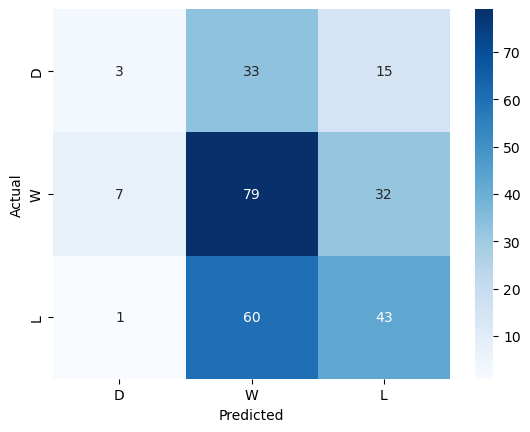

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["D", "W", "L"], yticklabels=["D", "W", "L"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
combined=pd.DataFrame(dict(actual=test["target"], prediction=preds))

In [25]:
pd.crosstab(index=combined["actual"], columns= combined["prediction"])

prediction,0,1,2
actual,,,
0,3,33,15
1,7,79,32
2,1,60,43


In [26]:
from sklearn.metrics import precision_score

precision = precision_score(test["target"], preds, average='weighted', zero_division=1)
print("Precision Score: {:.2f}".format(precision))

Precision Score: 0.43


In [27]:
from sklearn.metrics import f1_score

f1 = f1_score(test["target"], preds, average='weighted')
print("F1 Score: {:.2f}".format(f1))


F1 Score: 0.42
